In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [10]:
columns_used = ['borough', 'city', 'complaint_type', 'created_date', 'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude','street_name', 'unique_key'] 
df_311= pd.read_csv('C:/Users/GARIMA/Downloads/fhrw-4uyv.csv', parse_dates = ['created_date'], usecols = columns_used)
df_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-11-22 20:45:28,44996352,HEAT/HOT WATER,10030.0,114 WEST 134 STREET,WEST 134 STREET,NEW YORK,MANHATTAN,40.813749,-73.942115,RESIDENTIAL BUILDING
1,2019-11-22 12:02:07,44995138,UNSANITARY CONDITION,11235.0,8 BRIGHTON 15 STREET,BRIGHTON 15 STREET,BROOKLYN,BROOKLYN,40.577946,-73.954901,RESIDENTIAL BUILDING
2,2019-11-22 12:47:37,44994949,HEAT/HOT WATER,10452.0,1355 GRAND CONCOURSE,GRAND CONCOURSE,BRONX,BRONX,40.837688,-73.914632,RESIDENTIAL BUILDING
3,2019-11-22 19:46:28,44994043,HEAT/HOT WATER,11213.0,712 CROWN STREET,CROWN STREET,BROOKLYN,BROOKLYN,40.665347,-73.933809,RESIDENTIAL BUILDING
4,2019-11-22 13:00:52,44995755,HEAT/HOT WATER,10037.0,2300 5 AVENUE,5 AVENUE,NEW YORK,MANHATTAN,40.815510,-73.935632,RESIDENTIAL BUILDING


In [11]:
# Set the top complaint variable
df_311_top_complaint = df_311[df_311['complaint_type'] == 'HEAT/HOT WATER'].reset_index(drop = True)
df_311_top_complaint.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-11-22 20:45:28,44996352,HEAT/HOT WATER,10030.0,114 WEST 134 STREET,WEST 134 STREET,NEW YORK,MANHATTAN,40.813749,-73.942115,RESIDENTIAL BUILDING
1,2019-11-22 12:47:37,44994949,HEAT/HOT WATER,10452.0,1355 GRAND CONCOURSE,GRAND CONCOURSE,BRONX,BRONX,40.837688,-73.914632,RESIDENTIAL BUILDING
2,2019-11-22 19:46:28,44994043,HEAT/HOT WATER,11213.0,712 CROWN STREET,CROWN STREET,BROOKLYN,BROOKLYN,40.665347,-73.933809,RESIDENTIAL BUILDING
3,2019-11-22 13:00:52,44995755,HEAT/HOT WATER,10037.0,2300 5 AVENUE,5 AVENUE,NEW YORK,MANHATTAN,40.815510,-73.935632,RESIDENTIAL BUILDING
4,2019-11-22 10:46:26,44995228,HEAT/HOT WATER,11203.0,362 LINDEN BOULEVARD,LINDEN BOULEVARD,BROOKLYN,BROOKLYN,40.652856,-73.945765,RESIDENTIAL BUILDING


In [12]:
df_311_top_complaint.shape

(1198163, 11)

In [13]:
df_311_top_complaint['borough'].unique()

array(['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [14]:

df_311_top_complaint[df_311_top_complaint['borough']=='Unspecified']

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
933828,2018-03-10 11:16:48,38662770,HEAT/HOT WATER,10463.0,38 WEST 225 STREET,WEST 225 STREET,NEW YORK,Unspecified,40.873635,-73.907925,RESIDENTIAL BUILDING


In [15]:
df_311_top_complaint.at[933828, 'borough'] ='BRONX'

In [16]:

df_311_top_complaint['borough'].unique()

array(['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

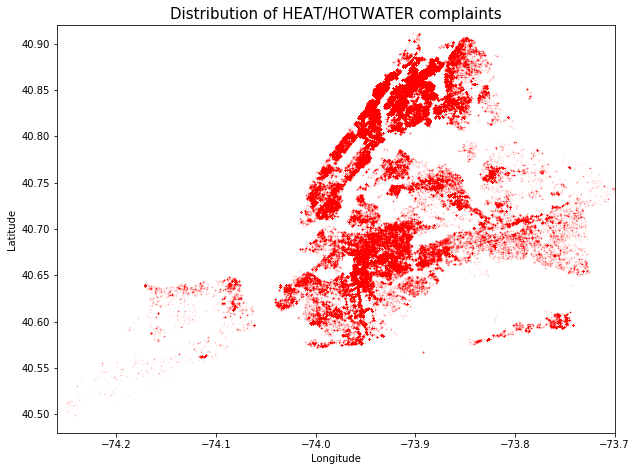

In [18]:
 #adjust settings
plt.figure(figsize=(10,7.5))

# create scatterplots
plt.scatter(df_311_top_complaint.longitude, df_311_top_complaint.latitude, alpha=0.02, s=1, color='red')

# adjust more settings
plt.title('Distribution of HEAT/HOTWATER complaints', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.48,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)

plt.show()


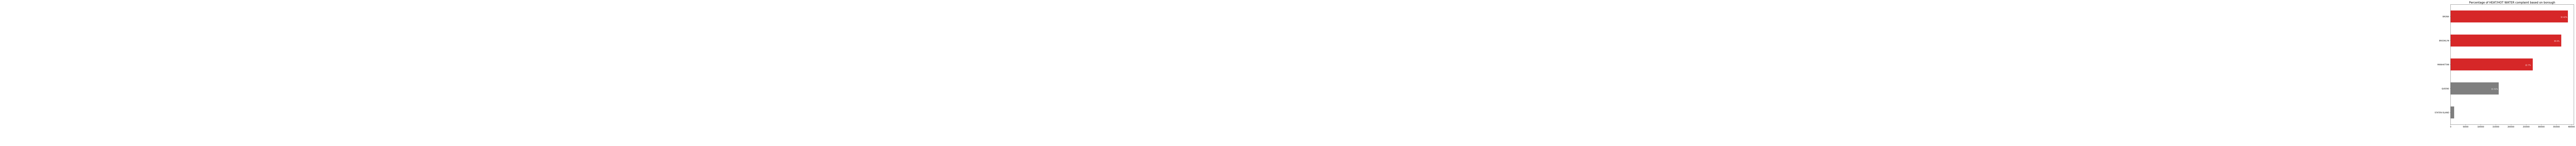

In [19]:
# Set bar color scheme
colors1 = ['C7', 'C7', 'C3', 'C3', 'C3']

borough_series_df311 = df_311_top_complaint['borough'].value_counts()
borough_series_df311.sort_values(ascending = True, inplace =True)
total_borough = borough_series_df311.sum()

# Create barh plot
borough_series_df311.plot(kind = 'barh', figsize = (12, 12), color = colors1)

# Set text label to show the percentage of each borough
for index, value in enumerate(borough_series_df311):
    label =  '{}%'.format(round((value/total_borough)*100, 2)) 
    plt.annotate(label, xy=(value - 25000, index- 0.05), color='white')

    
plt.title('Percentage of HEAT/HOT WATER complaint based on borough', size=15)
plt.show()

In [20]:
df_311_top_complaint['incident_zip'].unique()

array([10030., 10452., 11213., 10037., 11203., 11207., 11372., 10467.,
       10451., 11233., 11418., 11366., 10469., 10466., 11249., 10002.,
       11235., 10456., 11223., 11104., 10013., 10031., 11214., 11355.,
       10468., 10025., 11101., 11427., 11361., 10453., 11226., 10458.,
       10457., 11208., 10473., 11691., 11379., 10472., 11367., 10010.,
       10039., 10012., 11225., 11374., 10032., 10014., 10027., 11228.,
       10033., 11373., 11229., 10040., 10021., 11216., 10454., 10462.,
       11237., 11411., 10003., 11211., 11239., 10128., 11230., 11206.,
       10455., 10463., 11222., 10459., 10461., 10001., 11428., 11385.,
       11201., 11416., 11370., 11354., 11422., 11432., 10029., 11238.,
       11357., 10026., 10474., 10023., 11221., 11209., 11218., 11435.,
       11103., 10460., 11377., 11693., 10465., 11204., 11232., 11212.,
       11364., 11419., 11375., 11433., 10019., 11368., 10034., 10035.,
       10306., 11436., 10302., 10075., 11106., 11236., 10470., 10065.,
      

In [21]:
df_311_top_complaint[df_311_top_complaint['incident_zip'].isnull()]

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
1765,2019-11-04 12:33:46,44228485,HEAT/HOT WATER,NaN,3-16 BEACH 84 STREET,BEACH 84 STREET,NaN,QUEENS,NaN,NaN,RESIDENTIAL BUILDING
2470,2019-10-21 16:33:28,44110870,HEAT/HOT WATER,NaN,215 HILLSIDE AVENUE,HILLSIDE AVENUE,QUEENS,QUEENS,NaN,NaN,RESIDENTIAL BUILDING
8603,2019-11-15 07:33:51,44949022,HEAT/HOT WATER,NaN,99999-14 F D R DRIVE,F D R DRIVE,NaN,MANHATTAN,NaN,NaN,RESIDENTIAL BUILDING
10956,2019-11-14 09:42:24,44930538,HEAT/HOT WATER,NaN,2411 FREDERICK DOUGAL BOULEVARD,FREDERICK DOUGAL BOULEVARD,NaN,MANHATTAN,NaN,NaN,RESIDENTIAL BUILDING
11120,2019-11-14 17:23:26,44928807,HEAT/HOT WATER,NaN,215 HILLSIDE AVENUE,HILLSIDE AVENUE,QUEENS,QUEENS,NaN,NaN,RESIDENTIAL BUILDING
...,...,...,...,...,...,...,...,...,...,...,...
49447,2018-04-11 14:43:24,38916056,HEAT/HOT WATER,NaN,2002 ELLIS AVEUE,ELLIS AVEUE,NaN,BRONX,NaN,NaN,RESIDENTIAL BUILDING
49448,2019-03-08 16:16:17,41906159,HEAT/HOT WATER,NaN,6018 BLEECKER STREET,BLEECKER STREET,QUEENS,QUEENS,NaN,NaN,RESIDENTIAL BUILDING
49450,2019-01-31 10:26:28,41598450,HEAT/HOT WATER,NaN,1146 BRIGHTON BEACH AVENUE,BRIGHTON BEACH AVENUE,NaN,BROOKLYN,NaN,NaN,RESIDENTIAL BUILDING
49452,2019-02-02 00:05:06,41600916,HEAT/HOT WATER,NaN,1146 BRIGHTON BEACH AVENUE,BRIGHTON BEACH AVENUE,NaN,BROOKLYN,NaN,NaN,RESIDENTIAL BUILDING


In [22]:

zip_series_df311 = df_311_top_complaint['incident_zip'].value_counts().head(10)
zip_series_df311

11226.0    39877
10458.0    36924
10467.0    36130
10453.0    32534
10468.0    32512
10452.0    26744
10031.0    26146
10457.0    25823
10456.0    24377
10462.0    24242
Name: incident_zip, dtype: int64

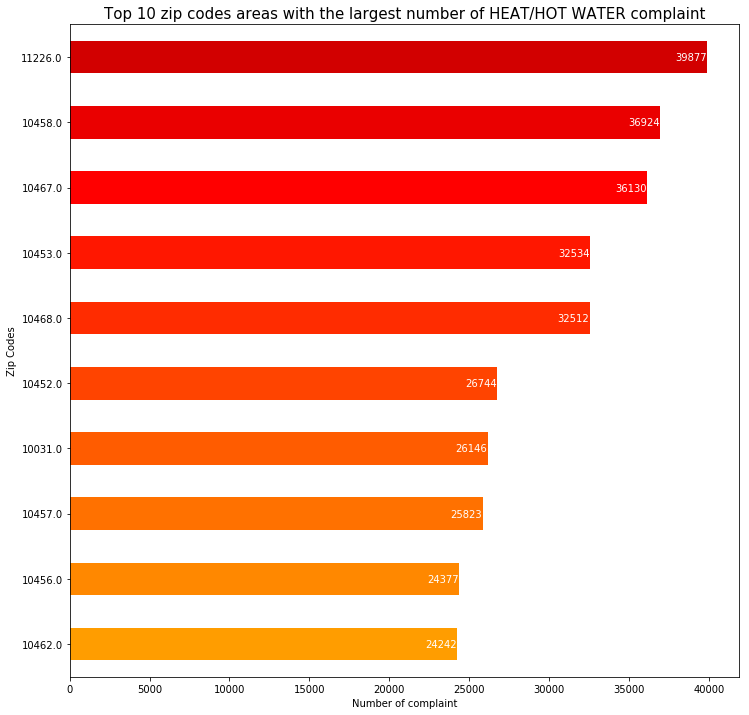

In [23]:
# Set bar color scheme
colors2= plt.cm.hot(np.linspace(0.6, 0.3, 10))

zip_series_df311.sort_values(ascending = True, inplace =True)

# Create barh plot
zip_series_df311.plot(kind = 'barh', figsize = (12, 12), color = colors2)

# Set text label to show the percentage of each borough
for index, value in enumerate(zip_series_df311):
    label =  '{}'.format(value) 
    plt.annotate(label, xy=(value - 2000, index- 0.05), color='white')

# adjust more settings
plt.title('Top 10 zip codes areas with the largest number of HEAT/HOT WATER complaint', size=15)
plt.xlabel('Number of complaint',size=10)
plt.ylabel('Zip Codes',size=10)
plt.show()

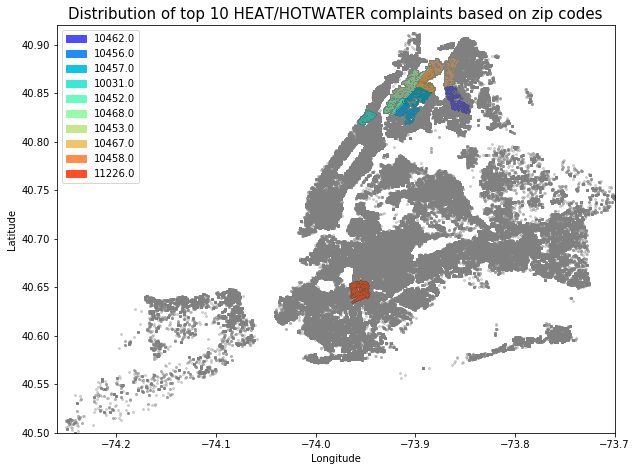

In [24]:

# adjust settings
plt.figure(figsize=(10,7.5))

# list of unique values in borough column
list_value_zip = zip_series_df311.keys()
# container for patches used in legends
patches = []

# setting color map
color_map = plt.cm.rainbow(np.linspace(0.1, 0.9, 10))

# create new york map using scatter plot
plt.scatter(df_311_top_complaint.longitude, df_311_top_complaint.latitude, alpha=0.3, s=4, color='grey')

for index, value in enumerate(list_value_zip):
    zip_top_complaint = df_311_top_complaint[df_311_top_complaint['incident_zip']== value]
    # create scatterplots
    plt.scatter(zip_top_complaint.longitude, zip_top_complaint.latitude, s=1, 
                alpha=0.02,color= color_map[index], marker ='.')
    # create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))

# create legend
plt.legend(patches,
           list_value_zip, 
           loc='upper left', prop={'size':10})

# adjust more settings
plt.title('Distribution of top 10 HEAT/HOTWATER complaints based on zip codes', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)
plt.show()

In [25]:
df_311_top_complaint[df_311_top_complaint['street_name'].isnull()]

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type


In [26]:
street_series_df311 = df_311_top_complaint.groupby(['borough'])
street_series_df311 = street_series_df311['street_name'].value_counts().sort_values(ascending = False).head(10)
street_series_df311

borough    street_name             
BRONX      GRAND CONCOURSE             20975
MANHATTAN  BROADWAY                    13260
QUEENS     ELMHURST AVENUE             10574
BROOKLYN   OCEAN AVENUE                 9610
BRONX      MORRIS AVENUE                9366
           BOYNTON AVENUE               8506
MANHATTAN  ST NICHOLAS AVENUE           7981
           AMSTERDAM AVENUE             7055
BRONX      DR M L KING JR BOULEVARD     6477
BROOKLYN   OCEAN PARKWAY                6028
Name: street_name, dtype: int64

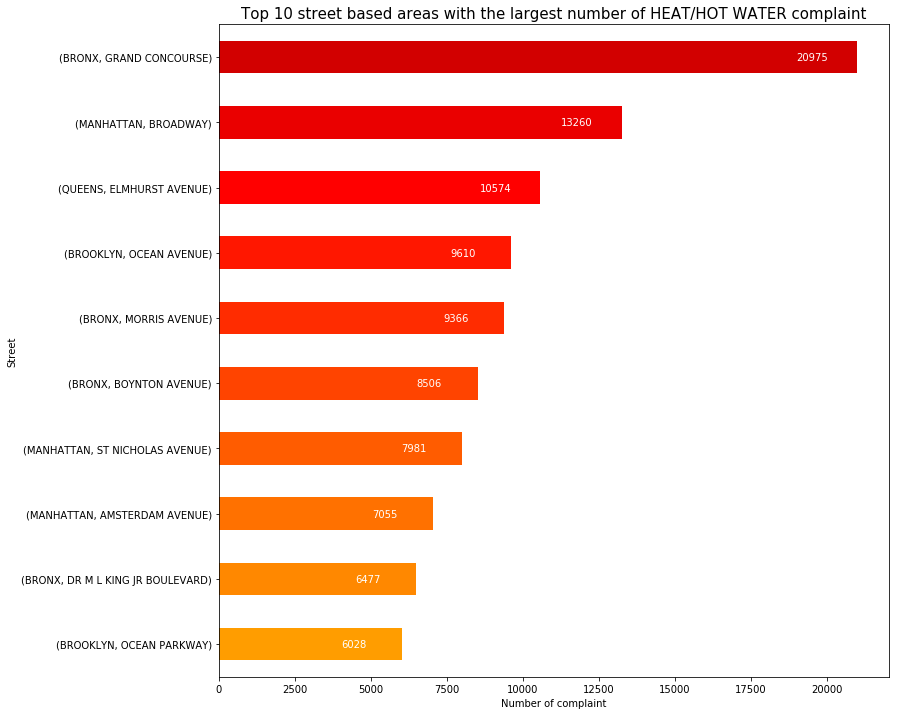

In [27]:
street_series_df311.sort_values(ascending = True, inplace =True)

# Create barh plot
street_series_df311.plot(kind = 'barh', figsize = (12, 12), color = colors2)

# Set text label to show the percentage of each borough
for index, value in enumerate(street_series_df311):
    label =  '{}'.format(value) 
    plt.annotate(label, xy=(value - 2000, index- 0.05), color='white')

# adjust more settings
plt.title('Top 10 street based areas with the largest number of HEAT/HOT WATER complaint', size=15)
plt.xlabel('Number of complaint',size=10)
plt.ylabel('Street',size=10)
plt.show()

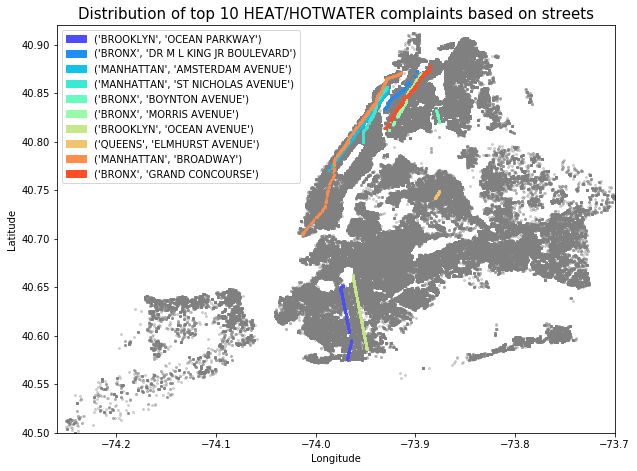

In [28]:
# adjust settings
plt.figure(figsize=(10,7.5))

# list of unique values in borough column
list_value_street = street_series_df311.keys()
# container for patches used in legends
patches = []

# setting color map
color_map = plt.cm.rainbow(np.linspace(0.1, 0.9, 10))

# create new york map using scatter plot
plt.scatter(df_311_top_complaint.longitude, df_311_top_complaint.latitude, alpha=0.3, s=4, color='grey')

for index, value in enumerate(list_value_street):
    street_top_complaint = df_311_top_complaint[np.logical_and(df_311_top_complaint['borough']== value[0], 
                                                               df_311_top_complaint['street_name']== value[1])]
    # create scatterplots
    plt.scatter(street_top_complaint.longitude, street_top_complaint.latitude, s=8, 
                alpha=0.7,color= color_map[index], marker ='.')
    # create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))

# create legend
plt.legend(patches,
           list_value_street, 
           loc='upper left', prop={'size':10})

# adjust more settings
plt.title('Distribution of top 10 HEAT/HOTWATER complaints based on streets', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)
plt.show()